In [1]:
# Access information from LAMDA
from astroquery.lamda import Lamda
import astropy.units as u

collrates, radtransitions, enlevels = Lamda.query(mol='ch3oh_a')
# print(enlevels) # I would have written the J column to be in two separate columns (J and K)

j_and_k = enlevels['J'] # Need to parse
energies = enlevels['Energy']

js, ks = map(list, zip(*[combo.split('_') for combo in j_and_k]))
js_int = [int(j) for j in js] # I feel like I shouldn't have to do this
ks_int = [int(k) for k in ks] # I feel like I shouldn't have to do this

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


In [2]:
from astropy import constants
energies_K = (((energies*(1/u.cm))*constants.h*constants.c).decompose()).to(u.K, equivalencies=u.temperature_energy())

In [3]:
# Build more useful table
from astropy.table import Table

tbl = Table([js_int, ks_int, energies_K], names=('J', 'K', 'Energy'))
tbl_lowE = tbl[tbl['Energy'] < 70*u.K] # used to be 40

In [4]:
# Separate into K levels
tbl_lowE_K0 = tbl_lowE[tbl_lowE['K'] == 0]
tbl_lowE_K1 = tbl_lowE[tbl_lowE['K'] == 1]
# tbl_lowE_K2 = tbl_lowE[tbl_lowE['K'] == 2]
tbl_lowE_Km1 = tbl_lowE[tbl_lowE['K'] == -1]

In [5]:
# Matplotlib setup
import matplotlib.pyplot as plt

SM_SIZE = 8
MD_SIZE = 12
LG_SIZE = 14

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

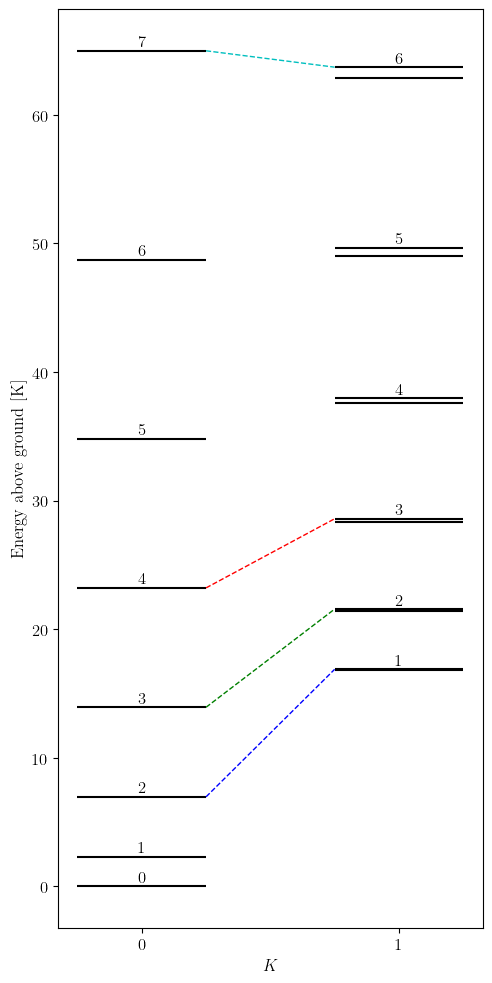

In [6]:
# Initialize energy level diagram and put levels on it
from energydiagram import ED

fig = plt.figure(figsize = (6, 10))

d = ED()

d.add_level(tbl_lowE_K0[0]['Energy'], '', top_text = tbl_lowE_K0[0]['J'])
for level in tbl_lowE_K0[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J'])
    
d.add_level(tbl_lowE_Km1[0]['Energy'], '', top_text = tbl_lowE_Km1[0]['J'])
for level in tbl_lowE_Km1[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J'])
    
d.add_level(tbl_lowE_K1[0]['Energy'], '', 'last', top_text = '') # tbl_lowE_K1[0]['J']
for level in tbl_lowE_K1[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = '') # level['J']
    
# d.add_level(tbl_lowE_K2[0]['Energy'], '', top_text = tbl_lowE_K2[0]['J'])
# for level in tbl_lowE_K2[1:]:
#     d.add_level(level['Energy'], '', 'last', top_text = level['J'])

# Set up spacings? Isn't working
d.dimension = 10 # Decrease to make plot wider
d.offset = 0.1
d.space = 10 # Decrease to make plot taller

# Add connections
d.add_link(4, 10, color = 'r') # 3_1, 4_0 at 107 GHz
d.add_link(3, 9, color = 'g') # 2_1, 3_0 at 157 GHz
d.add_link(2, 8, color = 'b') # 1_1, 2_0 at 206 GHz
d.add_link(7, 13, color = 'c') # 7_0, 6_1 at 44 GHz
# d.add_link(6, 12, color = 'm') # 5_1, 6_0 at 6.7 GHz, it's out of band for ALMA
# d.add_link(2, 14, color = 'm') # 3_-1, 2_0 at 12.1 GHz, took out of diagram because it's not in-band
# Can't do the 108 GHz transition because it's on the E ladder

d.plot(show_IDs = False, ax = fig.gca()) # Have to do this to create the plot; use show_IDs to show where connections should be

# Set up y-label
d.ax.set_ylabel('Energy above ground [K]')
# Make more spines visible
d.ax.spines['bottom'].set_visible(True)
d.ax.spines['top'].set_visible(True)
d.ax.spines['right'].set_visible(True)
# Set up x-label
d.ax.axes.get_xaxis().set_visible(True)
d.ax.set_xlabel(f'$K$')
d.ax.set_xticks([25, 45], ['0', '1'])

# Make sure background is transparent for poster
d.ax.set(facecolor = "white")
fig.patch.set_alpha(0.0)

# Output figure into Overleaf directory
fig.tight_layout()
plt.savefig("632e0742965a6e88270d73d7/energy_level_diagram.pdf", bbox_inches = 'tight')
# plt.savefig("632e0742965a6e88270d73d7/figures/energy_level_diagram.png", dpi = 250, bbox_inches = 'tight')